In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
# Read in data from file provided

datafile = './Harris_Leigh.dat'

RA_deg = np.genfromtxt(datafile, usecols=1, skip_header=3)
RA_arcmin = np.genfromtxt(datafile, usecols=2, skip_header=3)
RA_arcsec = np.genfromtxt(datafile, usecols=3, skip_header=3)

Dec_deg = np.genfromtxt(datafile, usecols=4, skip_header=3)
Dec_arcmin = np.genfromtxt(datafile, usecols=5, skip_header=3)
Dec_arcsec = np.genfromtxt(datafile, usecols=6, skip_header=3)

R_gc = np.genfromtxt(datafile, usecols=10, skip_header=3)
r_h = np.genfromtxt(datafile, usecols=28, skip_header=3)

c = np.genfromtxt(datafile, usecols=24, skip_header=3)
r_c = np.genfromtxt(datafile, usecols=27, skip_header=3)

In [28]:
# Process the data

RA, Dec, r_t = [], [], []

for i in range(len(RA_deg)):
    RA.append( RA_deg[i] + RA_arcmin[i]/60 + RA_arcsec[i]/3600 )
    Dec.append( Dec_deg[i] + Dec_arcmin[i]/60 + Dec_arcsec[i]/3600 )
    r_t.append( 10**c[i] * r_c[i] )

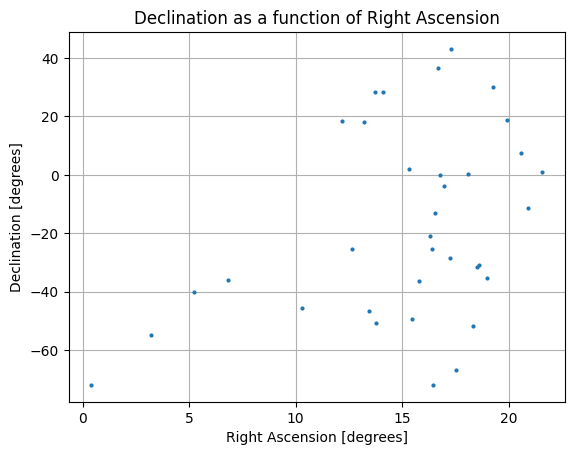

In [35]:
# Generate plots

# Plot 1: RA vs Dec
fig, ax = plt.subplots()
plt.plot(RA, Dec, 'o', markersize=2)
plt.xlabel('Right Ascension [degrees]')
plt.ylabel('Declination [degrees]')
plt.title('Declination as a function of Right Ascension')
plt.grid(True)
plt.savefig('./A1 Figures/RA_v_Dec.png', dpi=100, bbox_inches='tight')
plt.show()

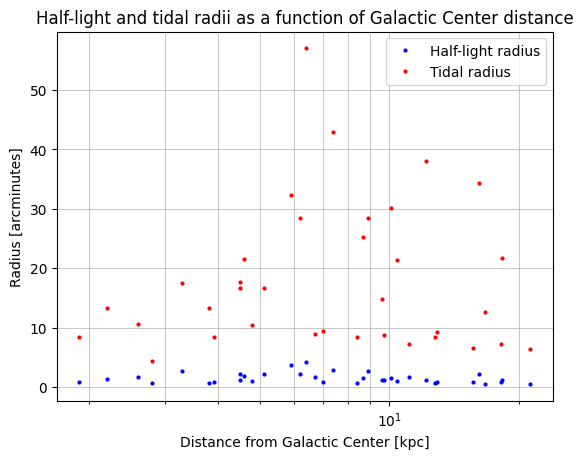

In [36]:
# Plot 2: half-light radius and tidal radius as a function of distance
fig, ax = plt.subplots()
plt.plot(R_gc, r_h, 'o', markersize=2, label='Half-light radius', color='blue')
plt.plot(R_gc, r_t, 'o', markersize=2, label='Tidal radius', color='red')
plt.xlabel('Distance from Galactic Center [kpc]')
plt.ylabel('Radius [arcminutes]')
plt.legend(loc='upper right')
plt.title('Half-light and tidal radii as a function of Galactic Center distance')
ax.grid(True, which='major', linestyle='-', linewidth=0.5)
ax.grid(True, which='minor', linestyle='-', linewidth=0.5)
plt.xscale('log')
plt.savefig('./A1 Figures/R_gc vs r_h, r_t.png', dpi=100, bbox_inches='tight')
plt.show()